In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import os, glob

In [2]:
path = os.path.join(os.path.dirname(os.getcwd()), '../Data/Extracted_data/')
os.chdir(path)

In [13]:
MBN = pd.read_csv('MBN.csv', index_col='Sample')
MBN['peak_ratio'] = MBN['peak']/MBN['peak_ref']
MBN['fwhm_ratio'] = MBN['fwhm']/MBN['fwhm_ref']
MBN['diff_two_peaks_ratio'] = MBN['diff_two_peaks']/MBN['diff_two_peaks_ref']
MBN['amp_ratio'] = MBN['amp']/MBN['amp_ref']
MBN['pos_ratio'] = MBN['pos']/MBN['pos_ref']
MBN['energy_ratio'] = MBN['energy']/MBN['energy_ref']
MBN

,location,measure,peak,peak_ref,fwhm,fwhm_ref,diff_two_peaks,diff_two_peaks_ref,amp,amp_ref,pos,pos_ref,energy,energy_ref,peak_ratio,fwhm_ratio,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio
Sample,,,,,,,,,,,,,,,,,,,,
41C,1,1,0.267420,0.164482,0.033634,0.019858,0.035758,0.025778,0.015838,0.013743,7686.0,7624,408.764909,273.907729,1.625834,1.693774,1.387175,1.152440,1.008132,1.492345
41C,1,2,0.220200,0.164482,0.029495,0.019858,0.052288,0.025778,0.017809,0.013743,7642.0,7624,407.653684,273.907729,1.338752,1.485317,2.028442,1.295872,1.002361,1.488288
41C,1,3,0.222581,0.164482,0.028561,0.019858,0.048347,0.025778,0.014434,0.013743,7638.0,7624,395.134422,273.907729,1.353230,1.438312,1.875537,1.050280,1.001836,1.442582
41C,2,1,0.269990,0.164482,0.034059,0.019858,0.050624,0.025778,0.018987,0.013743,7677.0,7624,390.800935,273.907729,1.641461,1.715168,1.963896,1.381618,1.006952,1.426761
41C,2,2,0.246733,0.164482,0.033052,0.019858,0.060581,0.025778,0.020128,0.013743,7642.0,7624,415.882398,273.907729,1.500066,1.664479,2.350162,1.464610,1.002361,1.518330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6C,5,2,0.266634,0.177791,0.030577,0.016124,0.055583,0.025268,0.014134,0.010430,7588.0,7684,356.821249,249.070282,1.499701,1.896428,2.199721,1.355084,0.987507,1.432613
6C,5,3,0.219244,0.177791,0.022055,0.016124,0.037694,0.025268,0.012990,0.010430,7604.0,7684,326.323321,249.070282,1.233153,1.367889,1.491771,1.245445,0.989589,1.310166
6C,6,1,0.194222,0.177791,0.024528,0.016124,0.042488,0.025268,0.013571,0.010430,7574.0,7684,337.986332,249.070282,1.092418,1.521262,1.681509,1.301129,0.985685,1.356992


In [14]:
fatigue = pd.read_excel('FatigueSampleInventory.xlsx', 
                        index_col=' Specimen ID',
                        usecols=[' Specimen ID', 'Cycles at NDE Test', 'Cycles at Failure', 'Current Unfailed Cycles']
                       )
fatigue.rename(columns={' Specimen ID':'ID', 'Cycles at NDE Test':'NDE_cyle', 'Cycles at Failure':'failure_cycle', 'Current Unfailed Cycles':'unfailed_cycle'}, inplace=True)
fatigue['f'] = fatigue['NDE_cyle']/fatigue['failure_cycle']
fatigue.head()

,NDE_cyle,failure_cycle,unfailed_cycle,f
Specimen ID,,,,
41C,0,2154137.0,NaN,0.0
43C,0,NaN,NaN,NaN
44C,0,1318034.0,NaN,0.0
45C,0,NaN,3245267.0,NaN
7C,150000,NaN,NaN,NaN


In [4]:
sample_names = MBN.index.unique()
sample_names

Index(['41C', '43C', '44C', '45C', '13C', '35C', '7C', '8C', '10C', '24C',
       '34C', '9C', '19C', '30C', '32C', '46C', '21C', '23C', '25C', '47C',
       '26C', '27C', '28C', '48C', '37C', '39C', '42C', '49C', '14C', '16C',
       '20C', '38C', '29C', '31C', '36C', '6C'],
      dtype='object', name='Sample')

In [15]:
merged = fatigue.join([MBN], how='left')
merged

,NDE_cyle,failure_cycle,unfailed_cycle,f,location,measure,peak,peak_ref,fwhm,fwhm_ref,...,pos,pos_ref,energy,energy_ref,peak_ratio,fwhm_ratio,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio
10C,300000,NaN,NaN,NaN,1,1,0.112808,0.381352,0.012945,0.044930,...,7595.0,7659,226.347515,492.328450,0.295811,0.288122,0.013857,1.201699,0.991644,0.459749
10C,300000,NaN,NaN,NaN,1,2,0.120779,0.381352,0.012152,0.044930,...,7596.0,7659,212.445910,492.328450,0.316712,0.270468,0.231172,1.174016,0.991774,0.431513
10C,300000,NaN,NaN,NaN,1,3,0.104006,0.381352,0.010181,0.044930,...,7610.0,7659,206.431887,492.328450,0.272730,0.226588,0.281758,1.160931,0.993602,0.419297
10C,300000,NaN,NaN,NaN,2,1,0.102089,0.381352,0.012182,0.044930,...,7595.0,7659,223.491921,492.328450,0.267703,0.271134,0.203032,1.446008,0.991644,0.453949
10C,300000,NaN,NaN,NaN,2,2,0.125326,0.381352,0.012568,0.044930,...,7597.0,7659,216.121413,492.328450,0.328636,0.279712,0.055437,1.322419,0.991905,0.438978
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9C,300000,NaN,NaN,NaN,5,2,0.167245,0.195118,0.012302,0.028154,...,7594.0,7673,237.455322,330.928637,0.857150,0.436975,0.845204,0.946523,0.989704,0.717542
9C,300000,NaN,NaN,NaN,5,3,0.126541,0.195118,0.015547,0.028154,...,7610.0,7673,241.487514,330.928637,0.648536,0.552209,1.238189,0.959996,0.991789,0.729727
9C,300000,NaN,NaN,NaN,6,1,0.127565,0.195118,0.014010,0.028154,...,7583.0,7673,256.887178,330.928637,0.653783,0.497643,0.700649,1.151344,0.988271,0.776262
9C,300000,NaN,NaN,NaN,6,2,0.151224,0.195118,0.016141,0.028154,...,7598.0,7673,272.135990,330.928637,0.775041,0.573306,0.794192,1.089761,0.990225,0.822340


In [18]:
merged.dropna(subset=['f'], inplace=True)
merged

,NDE_cyle,failure_cycle,unfailed_cycle,f,location,measure,peak,peak_ref,fwhm,fwhm_ref,...,pos,pos_ref,energy,energy_ref,peak_ratio,fwhm_ratio,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio
19C,450000,914392.0,NaN,0.49213,1,1,0.170239,0.141148,0.013263,0.015266,...,7563.0,7569,271.228452,250.529129,1.206103,0.868810,0.584232,1.075145,0.999207,1.082622
19C,450000,914392.0,NaN,0.49213,1,2,0.166757,0.141148,0.010844,0.015266,...,7581.0,7569,279.488016,250.529129,1.181436,0.710338,0.528201,1.202050,1.001585,1.115591
19C,450000,914392.0,NaN,0.49213,1,3,0.171017,0.141148,0.013662,0.015266,...,7602.0,7569,269.019354,250.529129,1.211619,0.894897,0.838459,1.002079,1.004360,1.073805
19C,450000,914392.0,NaN,0.49213,2,1,0.146062,0.141148,0.015033,0.015266,...,7562.0,7569,274.661128,250.529129,1.034817,0.984731,1.051599,1.150766,0.999075,1.096324
19C,450000,914392.0,NaN,0.49213,2,2,0.146263,0.141148,0.019210,0.015266,...,7585.0,7569,275.115002,250.529129,1.036242,1.258362,0.914182,0.957187,1.002114,1.098136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6C,318528,318528.0,NaN,1.00000,5,2,0.266634,0.177791,0.030577,0.016124,...,7588.0,7684,356.821249,249.070282,1.499701,1.896428,2.199721,1.355084,0.987507,1.432613
6C,318528,318528.0,NaN,1.00000,5,3,0.219244,0.177791,0.022055,0.016124,...,7604.0,7684,326.323321,249.070282,1.233153,1.367889,1.491771,1.245445,0.989589,1.310166
6C,318528,318528.0,NaN,1.00000,6,1,0.194222,0.177791,0.024528,0.016124,...,7574.0,7684,337.986332,249.070282,1.092418,1.521262,1.681509,1.301129,0.985685,1.356992
6C,318528,318528.0,NaN,1.00000,6,2,0.219782,0.177791,0.032719,0.016124,...,7595.0,7684,387.206327,249.070282,1.236178,2.029233,0.120680,1.357512,0.988417,1.554607


In [38]:
merged = merged.sort_values(by='f')
merged

,NDE_cyle,failure_cycle,unfailed_cycle,f,location,measure,peak,peak_ref,fwhm,fwhm_ref,...,pos,pos_ref,energy,energy_ref,peak_ratio,fwhm_ratio,diff_two_peaks_ratio,amp_ratio,pos_ratio,energy_ratio
44C,0,1318034.0,NaN,0.0,1,1,0.218401,0.154055,0.025947,0.014103,...,7638.0,7649,332.459764,228.414463,1.417683,1.839884,2.208805,1.291989,0.998562,1.455511
44C,0,1318034.0,NaN,0.0,6,1,0.257573,0.154055,0.031000,0.014103,...,7635.0,7649,355.263530,228.414463,1.671957,2.198177,2.597735,1.359200,0.998170,1.555346
44C,0,1318034.0,NaN,0.0,5,3,0.285246,0.154055,0.033960,0.014103,...,7644.0,7649,373.873745,228.414463,1.851587,2.408058,2.810997,1.432337,0.999346,1.636822
44C,0,1318034.0,NaN,0.0,5,2,0.234926,0.154055,0.028403,0.014103,...,7633.0,7649,353.926548,228.414463,1.524947,2.014009,1.991731,1.265104,0.997908,1.549493
44C,0,1318034.0,NaN,0.0,5,1,0.274334,0.154055,0.029955,0.014103,...,7637.0,7649,343.057703,228.414463,1.780752,2.124037,2.493603,1.453218,0.998431,1.501909
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29C,784540,784540.0,NaN,1.0,2,1,0.185335,0.271034,0.013411,0.036923,...,7588.0,7667,236.470093,407.635084,0.683809,0.363216,1.140663,1.007504,0.989696,0.580102
29C,784540,784540.0,NaN,1.0,2,2,0.136927,0.271034,0.012803,0.036923,...,7590.0,7667,248.379862,407.635084,0.505204,0.346745,1.099154,1.071889,0.989957,0.609319
29C,784540,784540.0,NaN,1.0,2,3,0.117673,0.271034,0.013171,0.036923,...,7611.0,7667,242.025398,407.635084,0.434163,0.356723,0.939232,1.095727,0.992696,0.593731
36C,348957,348957.0,NaN,1.0,2,2,0.146758,0.160341,0.014374,0.012858,...,7574.0,7926,281.817750,278.125593,0.915288,1.117926,0.812166,1.273177,0.955589,1.013275


In [58]:
merged['f'] = np.round(merged['f'], 3)

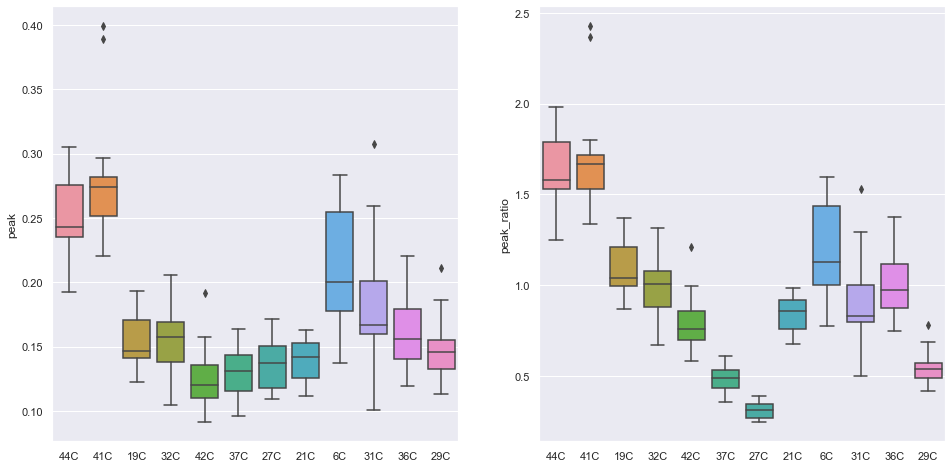

In [41]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
sns.boxplot(x=merged.index, y=merged['peak'],  orient='v', ax=axes[0])
sns.boxplot(x=merged.index, y=merged['peak_ratio'],  orient='v', ax=axes[1])
sns.set(rc={'figure.figsize': (12,6)})


In [ ]:
['peak_ratio'] = MBN['peak']/MBN['peak_ref']
MBN['fwhm_ratio'] = MBN['fwhm']/MBN['fwhm_ref']
MBN['diff_two_peaks_ratio'] = MBN['diff_two_peaks']/MBN['diff_two_peaks_ref']
MBN['amp_ratio'] = MBN['amp']/MBN['amp_ref']
MBN['pos_ratio'] = MBN['pos']/MBN['pos_ref']
MBN['energy_ratio'

fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
def plot_val_vs_ratio(col):
    

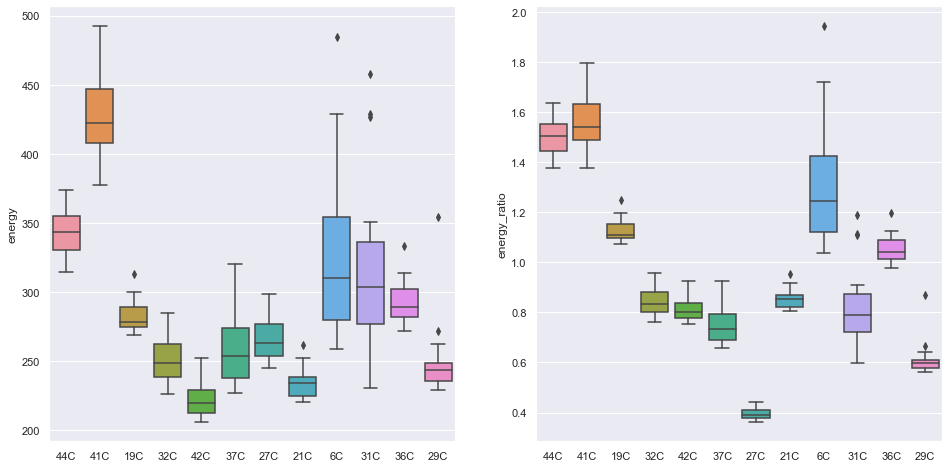

In [72]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
sns.boxplot(x=merged.index, y=merged['energy'], orient='v', ax=axes[0])
sns.boxplot(x=merged.index, y=merged['energy_ratio'], orient='v', ax=axes[1])
sns.set(rc={'figure.figsize': (8,4.5)})

TypeError: unsupported operand type(s) for /: 'str' and 'int'

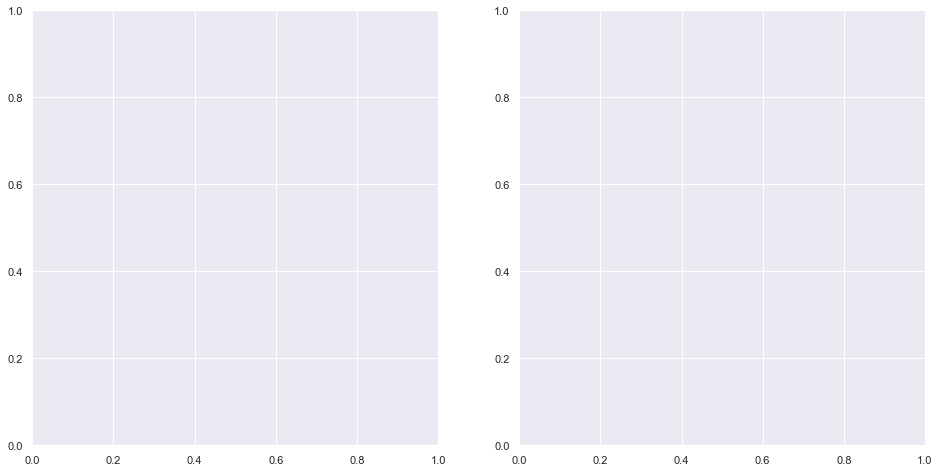

In [66]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
sns.boxplot(x=merged.index, y=merged['fwhm'], orient='h', hue=merged['f'], ax=axes[0], width=1)
sns.boxplot(x=merged.index, y=merged['fwhm_ratio'], orient='h', hue=merged['f'], ax=axes[1], width=4)
sns.set(rc={'figure.figsize': (16,6)})

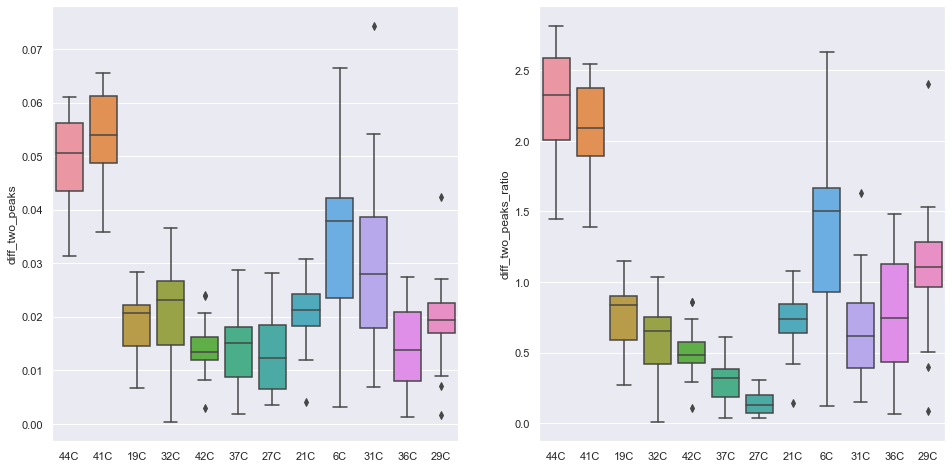

In [55]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
sns.boxplot(x=merged.index, y=merged['diff_two_peaks'], orient='v', ax=axes[0])
sns.boxplot(x=merged.index, y=merged['diff_two_peaks_ratio'], orient='v', ax=axes[1])
sns.set(rc={'figure.figsize': (12,6)})

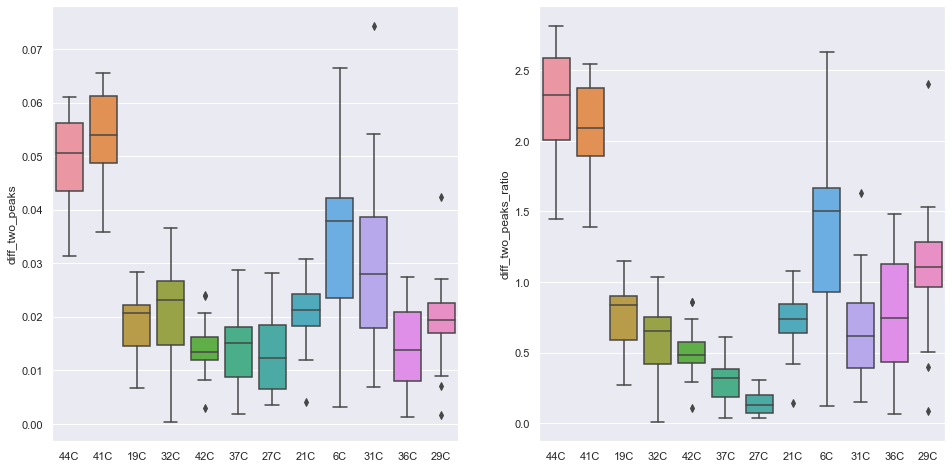

In [56]:
fig, axes = plt.subplots(1, 2, sharex=False, figsize=(16,8))
sns.boxplot(x=merged.index, y=merged['diff_two_peaks'], orient='v', ax=axes[0])
sns.boxplot(x=merged.index, y=merged['diff_two_peaks_ratio'], orient='v', ax=axes[1])
sns.set(rc={'figure.figsize': (12,6)})